In [1]:
# csv file
datafile = "deep1B_f2_apu-3_cpu-512GB_gpu-GEFORCERTXTI.csv"

In [3]:
import pandas as pd
df = pd.read_csv(datafile)

apu = df[ df['device']=='apu'] 
apu__qs_1000 = apu[ apu['query_set_size']==1000 ] 
apu__qs_1000__k_10 = apu__qs_1000[ apu__qs_1000['k']==10 ]
print(apu__qs_1000__k_10)

cpu = df[ df['device']=='cpu'] 
cpu__qs_1000 = cpu[ cpu['query_set_size']==1000 ] 
cpu__qs_1000__k_10 = cpu__qs_1000[ cpu__qs_1000['k']==10 ]
print(cpu__qs_1000__k_10)

gpu = df[ df['device']=='gpu'] 
gpu__qs_1000 = gpu[ gpu['query_set_size']==1000 ] 
gpu__qs_1000__k_10 = gpu__qs_1000[ gpu__qs_1000['k']==10 ]
print(gpu__qs_1000__k_10)

  device  query_set_size   k  params   latency  recall
6    apu            1000  10      -1  1.536516  0.3404
   device  query_set_size   k  params   latency  recall
84    cpu            1000  10       1  1.267112  0.3492
85    cpu            1000  10       2  1.154131  0.4671
86    cpu            1000  10       4  1.151262  0.6997
87    cpu            1000  10      16  1.174254  0.5844
88    cpu            1000  10      32  1.588808  0.8722
   device  query_set_size   k  params   latency  recall
39    gpu            1000  10       1  0.039776  0.3492
40    gpu            1000  10       2  0.044932  0.4671
41    gpu            1000  10       4  0.100426  0.6997
42    gpu            1000  10      16  0.051645  0.5844
43    gpu            1000  10      32  0.276914  0.8722


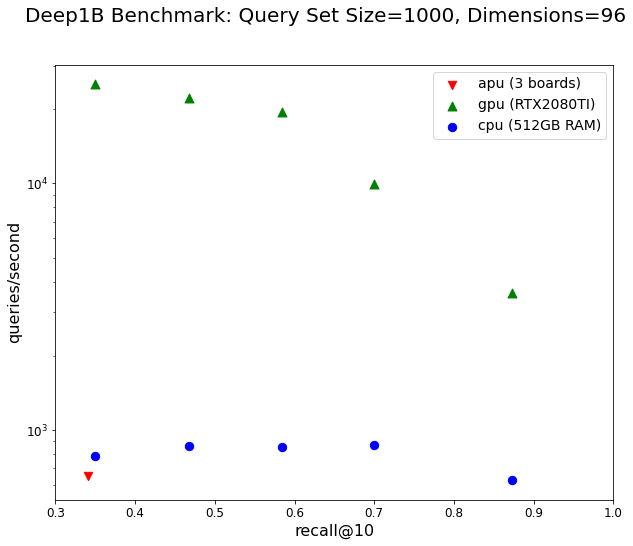

In [49]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('axes', labelsize=16, titlesize=16)
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams["figure.titlesize"] = 14
plt.rcParams["figure.titleweight"] = 'roman'
#print(plt.rcParams.keys())

apu_latency = apu__qs_1000__k_10['latency'].tolist()
apu_qps = [ 1000/l for l in apu_latency]
apu_recall = apu__qs_1000__k_10['recall'].tolist()

cpu_latency = cpu__qs_1000__k_10['latency'].tolist()
cpu_qps = [ 1000/l for l in cpu_latency]
cpu_recall = cpu__qs_1000__k_10['recall'].tolist()

gpu_latency = gpu__qs_1000__k_10['latency'].tolist()
gpu_qps = [ 1000/l for l in gpu_latency]
gpu_recall = gpu__qs_1000__k_10['recall'].tolist()

plt.scatter( apu_recall, apu_qps, 
             marker = 'v', s=70,
                 color=['red' for i in range(len(apu_latency))])
plt.scatter( gpu_recall, gpu_qps, 
             marker = '^', s=80,
                color=['green' for i in range(len(apu_latency))])
plt.scatter( cpu_recall, cpu_qps, 
            marker = 'o', s=70,
                color=['blue' for i in range(len(apu_latency))])

plt.yscale('log')
plt.ylabel('queries/second')
plt.xlim([0.3, 1.0])
plt.xlabel('recall@10')

plt.legend(['apu (3 boards)','gpu (RTX2080TI)', 'cpu (512GB RAM)'],fontsize=14)

plt.suptitle('Deep1B Benchmark: Query Set Size=1000, Dimensions=96', fontsize=20)
fig = plt.gcf()
fig.patch.set_alpha(1)
fig.savefig("deep1B_compare.png",facecolor=fig.get_facecolor(), edgecolor='none', transparent=False)